In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('retail_sales_dataset.csv')

In [11]:
print(df.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [10]:
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [12]:
df.dropna(inplace=True)

In [13]:
print(df.describe())

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [13]:
print(df.mode())

     Transaction ID        Date Customer ID  Gender   Age Product Category  \
0                 1  2023-05-16     CUST001  Female  43.0         Clothing   
1                 2         NaN     CUST002     NaN  64.0              NaN   
2                 3         NaN     CUST003     NaN   NaN              NaN   
3                 4         NaN     CUST004     NaN   NaN              NaN   
4                 5         NaN     CUST005     NaN   NaN              NaN   
..              ...         ...         ...     ...   ...              ...   
995             996         NaN     CUST995     NaN   NaN              NaN   
996             997         NaN     CUST996     NaN   NaN              NaN   
997             998         NaN     CUST997     NaN   NaN              NaN   
998             999         NaN     CUST998     NaN   NaN              NaN   
999            1000         NaN     CUST999     NaN   NaN              NaN   

     Quantity  Price per Unit  Total Amount  
0         4.0    

In [14]:
median = df['Age'].median()

In [15]:
std_dev = df['Age'].std()

In [16]:
print(f'Median: {median}, Standard Deviation: {std_dev}')

Median: 42.0, Standard Deviation: 13.681429659122532


In [17]:
df['Date'] = pd.to_datetime(df['Date'])

In [23]:
Amount_by_date = df.groupby('Date')['Total Amount'].sum()

In [24]:
import matplotlib.pyplot as plt

In [25]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

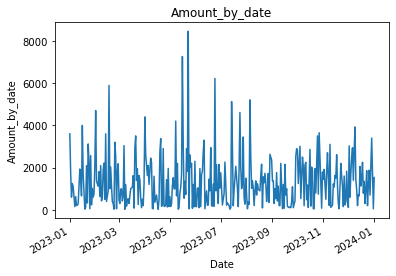

In [29]:
Amount_by_date.plot()
plt.title('Amount_by_date')
plt.ylabel('Amount_by_date')
plt.show()

In [30]:
# Top 10 best-selling products

In [39]:
print(df.columns)

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [40]:
# Top 10 best-selling products
top_products = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(10)
print(top_products)

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


In [41]:
customer_data = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False)
print(customer_data)

Customer ID
CUST487    2000
CUST476    2000
CUST773    2000
CUST503    2000
CUST093    2000
           ... 
CUST309      25
CUST907      25
CUST285      25
CUST242      25
CUST657      25
Name: Total Amount, Length: 1000, dtype: int64


In [42]:
import seaborn as sns

In [43]:
# Bar chart for top products

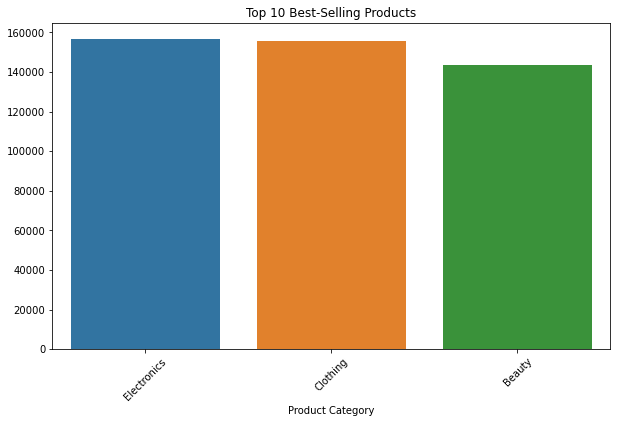

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 10 Best-Selling Products')
plt.xticks(rotation=45)
plt.show()

In [45]:
# Heatmap for correlations between features

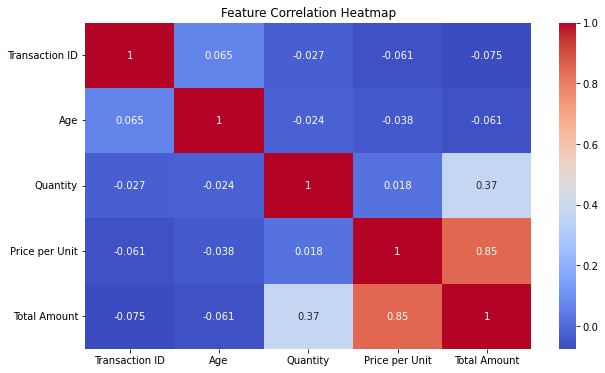

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()